# Logistic Regression

In the logistic regression, a regression curve, y = f (x), is fitted. In the regression curve equation, y is a categorical variable. This Regression Model is used for predicting that y has given a set of predictors x. Therefore, predictors can be categorical, continuous, or a mixture of both.

The logistic regression is a classification algorithm that falls under nonlinear regression. This model is used to predict a given binary result (1/0, yes/no, true/false) as a set of independent variables. Furthermore, it helps to represent categorical/binary outcomes using dummy variables.

Logistic regression is a regression model in which the response variable has categorical values such as true/false or 0/1. Therefore, we can measure the probability of the binary response

In [1]:
library(tidyverse)
library(extrafont)
library(extrafontdb)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'extrafont' was built under R version 3.6.2"Registering fonts with R


In [2]:
titanic_data <- read_csv("titanic.csv")
head(titanic_data)

Parsed with column specification:
cols(
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  `Siblings/Spouses Aboard` = col_double(),
  `Parents/Children Aboard` = col_double(),
  Fare = col_double()
)


Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583


In [3]:
str(titanic_data)

tibble [887 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Survived               : num [1:887] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass                 : num [1:887] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name                   : chr [1:887] "Mr. Owen Harris Braund" "Mrs. John Bradley (Florence Briggs Thayer) Cumings" "Miss. Laina Heikkinen" "Mrs. Jacques Heath (Lily May Peel) Futrelle" ...
 $ Sex                    : chr [1:887] "male" "female" "female" "female" ...
 $ Age                    : num [1:887] 22 38 26 35 35 27 54 2 27 14 ...
 $ Siblings/Spouses Aboard: num [1:887] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parents/Children Aboard: num [1:887] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare                   : num [1:887] 7.25 71.28 7.92 53.1 8.05 ...
 - attr(*, "spec")=
  .. cols(
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   `Siblings/Spouses Aboard` = col_double(),
  ..   `Parents/Children Aboard` = col_doubl

In [27]:
titanic_data <- titanic_data %>% 
  mutate(Survived = factor(Survived, levels = c(0, 1), labels = c("Died", "Survived")),
         Sex = factor(Sex),
         Pclass = factor(Pclass))

head(titanic_data)

Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Died,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
Survived,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
Died,3,Mr. William Henry Allen,male,35,0,0,8.0500
Died,3,Mr. James Moran,male,27,0,0,8.4583


In [28]:
summary(titanic_data)

     Survived   Pclass      Name               Sex           Age       
 Died    :545   1:216   Length:887         female:314   Min.   : 0.42  
 Survived:342   2:184   Class :character   male  :573   1st Qu.:20.25  
                3:487   Mode  :character                Median :28.00  
                                                        Mean   :29.47  
                                                        3rd Qu.:38.00  
                                                        Max.   :80.00  
 Siblings/Spouses Aboard Parents/Children Aboard      Fare        
 Min.   :0.0000          Min.   :0.0000          Min.   :  0.000  
 1st Qu.:0.0000          1st Qu.:0.0000          1st Qu.:  7.925  
 Median :0.0000          Median :0.0000          Median : 14.454  
 Mean   :0.5254          Mean   :0.3833          Mean   : 32.305  
 3rd Qu.:1.0000          3rd Qu.:0.0000          3rd Qu.: 31.137  
 Max.   :8.0000          Max.   :6.0000          Max.   :512.329  

In [29]:
str(titanic_data)

tibble [887 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Survived               : Factor w/ 2 levels "Died","Survived": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass                 : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name                   : chr [1:887] "Mr. Owen Harris Braund" "Mrs. John Bradley (Florence Briggs Thayer) Cumings" "Miss. Laina Heikkinen" "Mrs. Jacques Heath (Lily May Peel) Futrelle" ...
 $ Sex                    : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age                    : num [1:887] 22 38 26 35 35 27 54 2 27 14 ...
 $ Siblings/Spouses Aboard: num [1:887] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parents/Children Aboard: num [1:887] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare                   : num [1:887] 7.25 71.28 7.92 53.1 8.05 ...
 - attr(*, "spec")=
  .. cols(
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   `Siblings/Spouses Aboard` = co

In [30]:
table(titanic_data$Survived)


    Died Survived 
     545      342 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

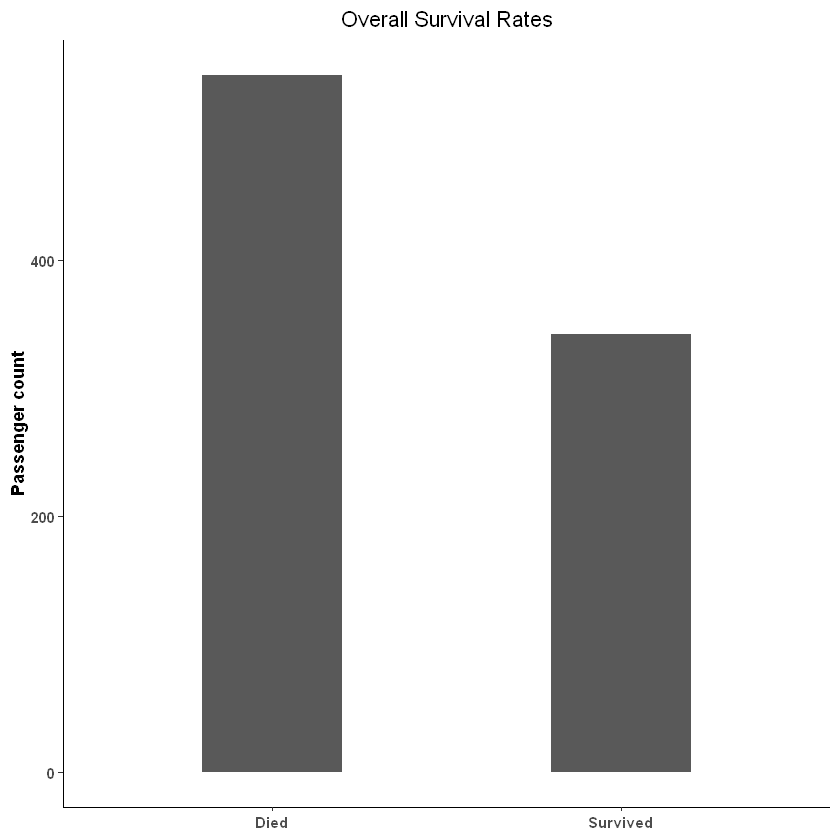

In [31]:
titanic_data %>% 
  ggplot(aes(x = Survived)) +
  geom_bar(width = 0.4) +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman",face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold")
  ) +
  labs(title = "Overall Survival Rates", x = NULL, y = "Passenger count")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

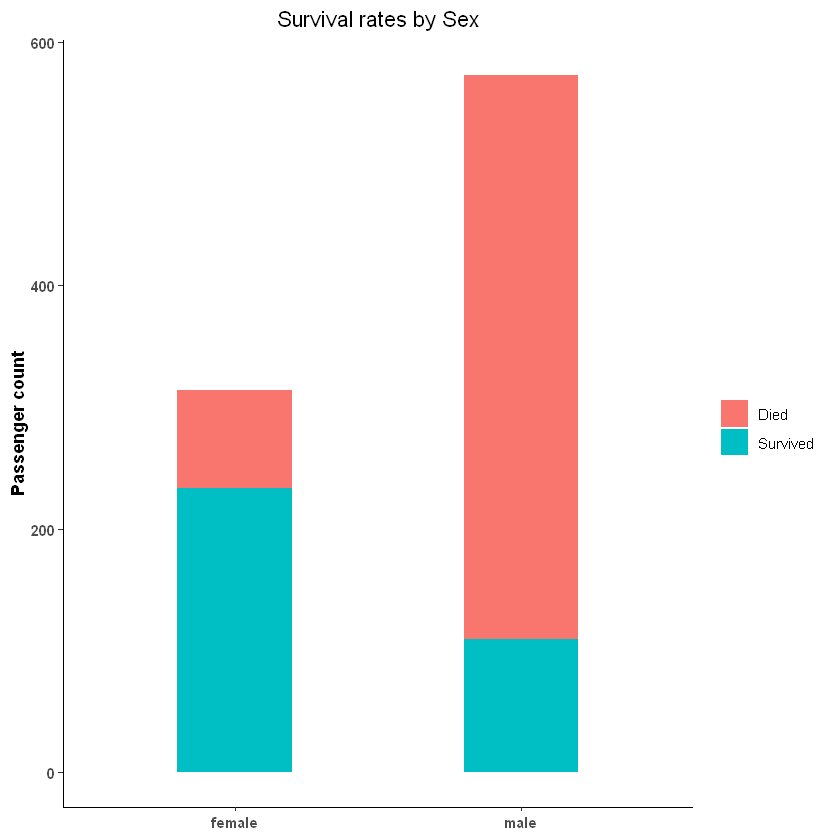

In [32]:
titanic_data %>% 
  ggplot(aes(x = Sex, fill = Survived)) +
  geom_bar(width = 0.4) +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman",face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(family = "Times New Roman")
    
  ) +
  labs(title = "Survival rates by Sex", x = NULL, y = "Passenger count")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

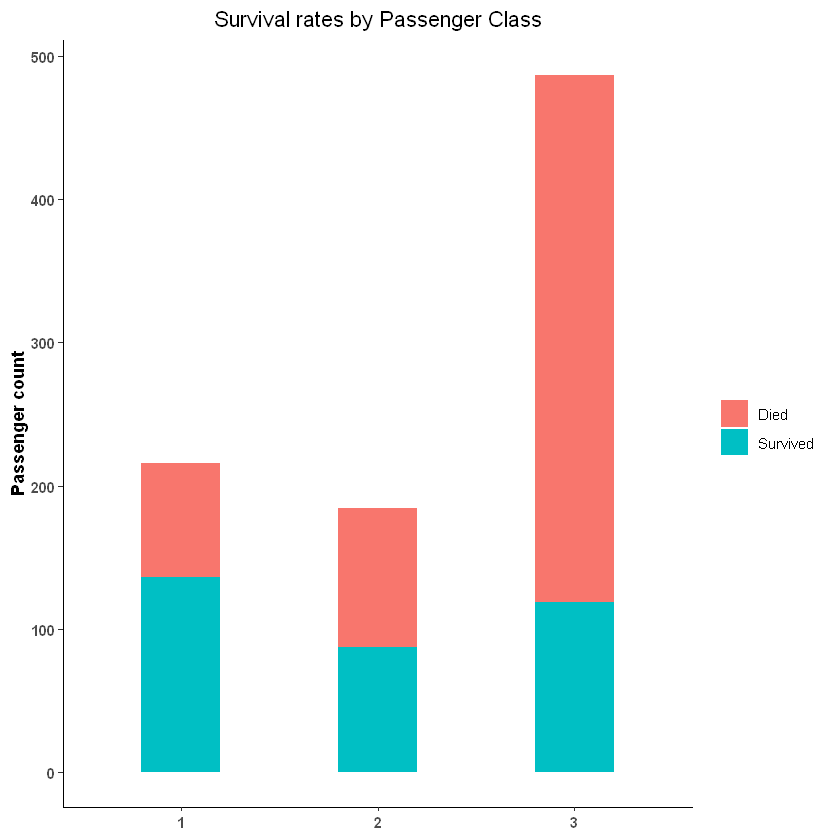

In [33]:
titanic_data %>% 
  ggplot(aes(x = Pclass, fill = Survived)) +
  geom_bar(width = 0.4) +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman",face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(family = "Times New Roman")
    
  ) +
  labs(title = "Survival rates by Passenger Class", x = NULL, y = "Passenger count")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid

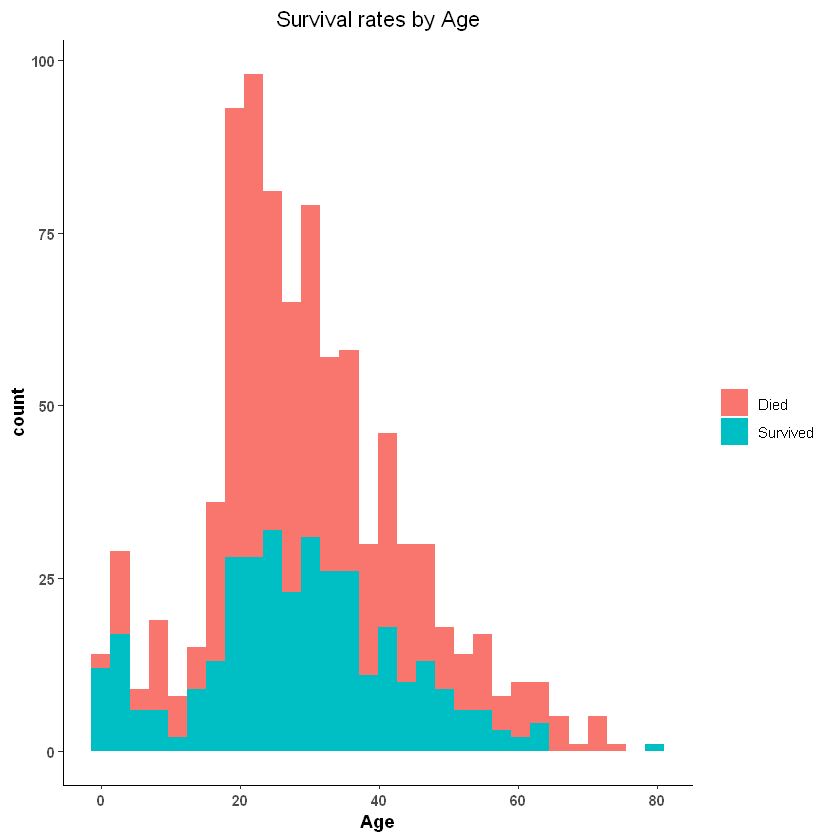

In [34]:
titanic_data %>% 
  ggplot(aes(x = Age, fill = Survived)) +
  geom_histogram() +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman",face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(family = "Times New Roman")
    
  ) +
  labs(title = "Survival rates by Age")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

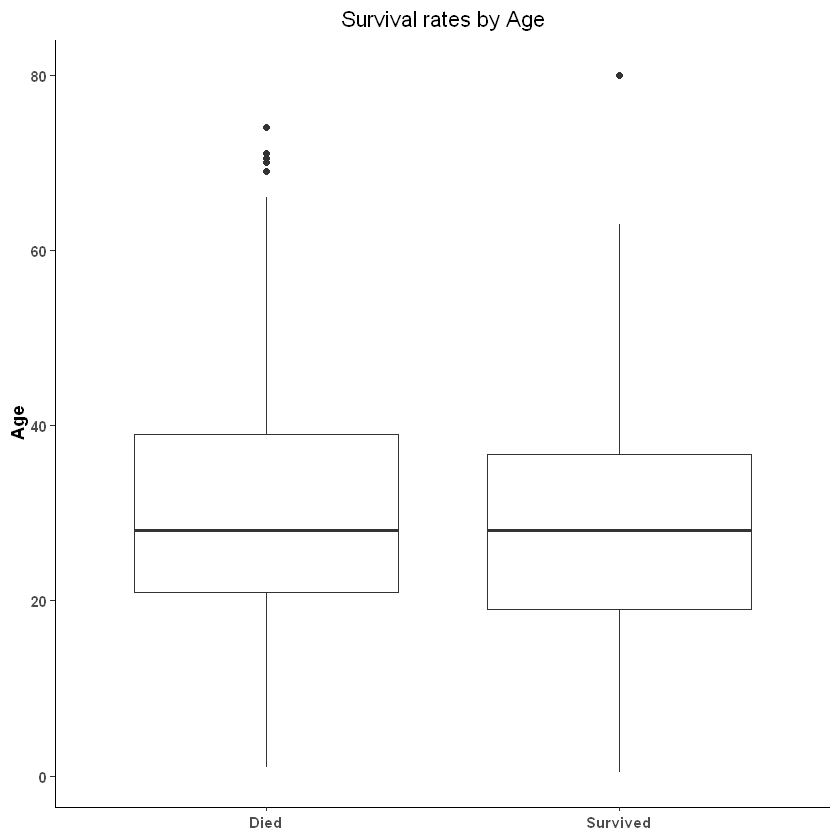

In [35]:
titanic_data %>% 
  ggplot(aes(x = Survived, y = Age)) +
  geom_boxplot() +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman", face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(family = "Times New Roman")
    
  ) +
  labs(title = "Survival rates by Age", x = NULL)

# Survival rates by sex and Pclass

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

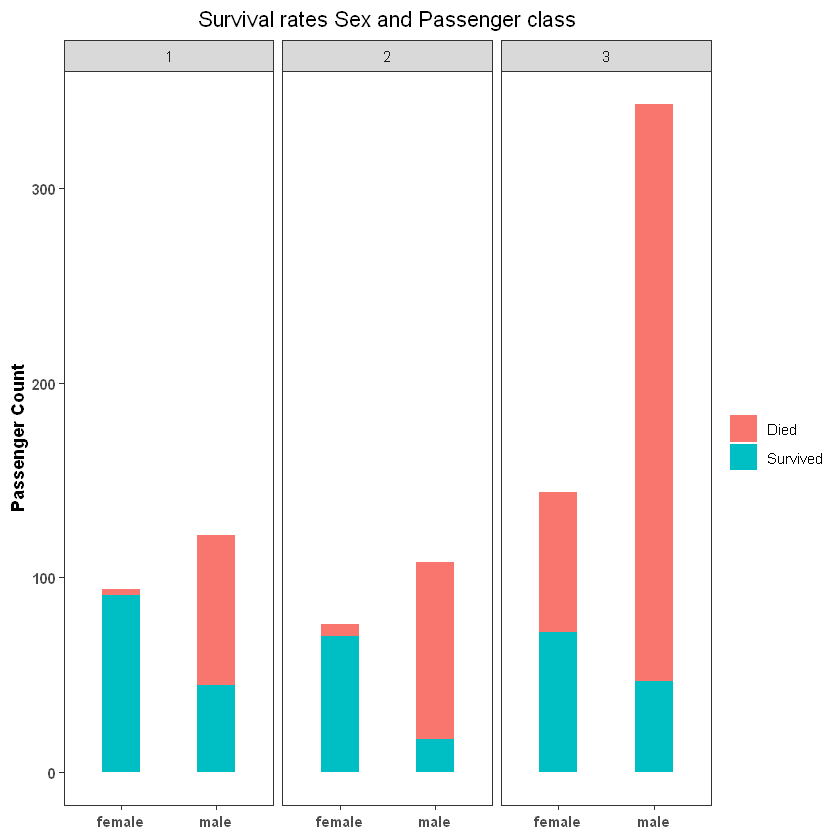

In [36]:
titanic_data %>% 
  ggplot(aes(x = Sex, fill = Survived)) +
  geom_bar(width = 0.4) +
  facet_wrap(~ Pclass) +
  theme_test() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman", face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(family = "Times New Roman")
    
  ) +
  labs(title = "Survival rates Sex and Passenger class", x = NULL, y = "Passenger Count")

## Survival rates by Age. Sex and Passenger Class

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid

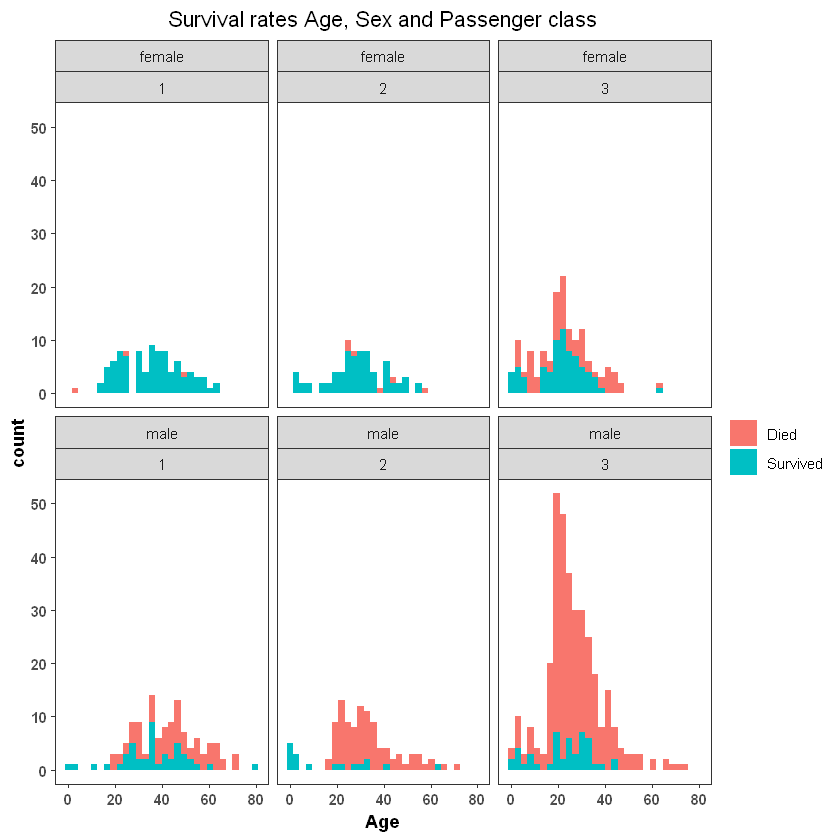

In [38]:
titanic_data %>% 
  ggplot(aes(x = Age, fill = Survived)) +
  geom_histogram() +
  facet_wrap(~Sex + Pclass) +
  theme_test() +
  theme(
    plot.title = element_text(family = "Times New Roman", hjust = 0.5),
    axis.text = element_text(family = "Times New Roman", face = "bold"),
    axis.title = element_text(family = "Times New Roman", face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(family = "Times New Roman")
    
  ) +
  labs(title = "Survival rates Age, Sex and Passenger class")

In [39]:
titanic <- read.csv("train.csv")

In [41]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [42]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [43]:
## removing insignificant variables
titanic <- subset(titanic, select = c(2,3,5,6,7,8,10,12))

In [44]:
## checking if the variable are categorical or not
is.factor(titanic$Sex)

[1] TRUE

In [45]:
is.factor(titanic$Embarked)

[1] TRUE

In [46]:
#removing missing value by Knn Approach
library(DMwR)

Warning message:
"package 'DMwR' was built under R version 3.6.3"Loading required package: lattice
Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [47]:
summary(is.na(titanic))

  Survived         Pclass           Sex             Age         
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:891       FALSE:891       FALSE:891       FALSE:714      
                                                 TRUE :177      
   SibSp           Parch            Fare          Embarked      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:891       FALSE:891       FALSE:891       FALSE:891      
                                                                

In [48]:
titanic <- knnImputation(titanic)

In [49]:
summary(is.na(titanic))

  Survived         Pclass           Sex             Age         
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:891       FALSE:891       FALSE:891       FALSE:891      
   SibSp           Parch            Fare          Embarked      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:891       FALSE:891       FALSE:891       FALSE:891      

In [50]:
dim(titanic)

[1] 891   8

In [51]:
train <- titanic[1:800,]
test <- titanic[801:891,]

In [52]:
# fitting the logistic regression when considering all the predictors
basemodel <- glm(Survived~., family = binomial(link = "logit"), data = train)

In [53]:
summary(basemodel)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7536  -0.5968  -0.4042   0.6255   2.5013  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.664e+01  5.354e+02   0.031  0.97521    
Pclass      -1.266e+00  1.614e-01  -7.845 4.32e-15 ***
Sexmale     -2.688e+00  2.147e-01 -12.523  < 2e-16 ***
Age         -4.917e-02  8.499e-03  -5.786 7.22e-09 ***
SibSp       -3.728e-01  1.170e-01  -3.186  0.00144 ** 
Parch       -1.096e-01  1.321e-01  -0.830  0.40664    
Fare         7.557e-04  2.333e-03   0.324  0.74604    
EmbarkedC   -1.076e+01  5.354e+02  -0.020  0.98396    
EmbarkedQ   -1.076e+01  5.354e+02  -0.020  0.98397    
EmbarkedS   -1.103e+01  5.354e+02  -0.021  0.98356    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1066.33  on 799  degrees of free

In [54]:
# analysis of variance table of the fitted model
anova(basemodel, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,799,1066.3342,NA
Pclass,1,84.7785466,798,981.5557,3.337258e-20
Sex,1,240.0842621,797,741.4714,3.769924e-54
Age,1,27.5631328,796,713.9083,1.520495e-07
SibSp,1,16.8676478,795,697.0407,4.007893e-05
Parch,1,0.7983955,794,696.2423,3.715735e-01
Fare,1,0.3501133,793,695.8921,5.540490e-01
Embarked,3,1.6292692,790,694.2629,6.527716e-01


In [55]:
# fitting of logistic regression when considering only the statistically significant predictors
model <- glm(Survived~.-Parch-Fare-Embarked, family = binomial(link = "logit"),data = train)

In [56]:
summary(model)


Call:
glm(formula = Survived ~ . - Parch - Fare - Embarked, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8272  -0.6029  -0.3846   0.6072   2.4906  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.801178   0.545447  10.636  < 2e-16 ***
Pclass      -1.308035   0.136657  -9.572  < 2e-16 ***
Sexmale     -2.688206   0.206902 -12.993  < 2e-16 ***
Age         -0.049877   0.008442  -5.908 3.46e-09 ***
SibSp       -0.415307   0.111385  -3.729 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1066.33  on 799  degrees of freedom
Residual deviance:  697.04  on 795  degrees of freedom
AIC: 707.04

Number of Fisher Scoring iterations: 5


In [57]:
anova(model, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,799,1066.3342,NA
Pclass,1,84.77855,798,981.5557,3.337258e-20
Sex,1,240.08426,797,741.4714,3.769924e-54
Age,1,27.56313,796,713.9083,1.520495e-07
SibSp,1,16.86765,795,697.0407,4.007893e-05


In [58]:
predict <- predict(model,newdata = test,type = "response")

In [59]:
library(caret)
predict <- ifelse(predict > 0.5,1,0)
error <- mean(predict != test$Survived)
print(paste('Accuracy',1-error))


Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



[1] "Accuracy 0.824175824175824"


[1] "Not Equal FALSE"